# Welcome
Clustering with K-Means, Hierarchical methods and use PCA.

In [319]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [320]:
data = pd.read_csv('A:\Python Bootcamp\Week 7\Country-data (1).csv')

# Explanation of Data:

This dataset contains the development levels of 167 countries in terms of socio-economic and health factors.

The columns in the dataset are as follows:

- country: Name of the country
- child_mort: Child mortality rate per 1000 live births under the age of 5
- exports: Exports per capita, given as a percentage of the Gross National Income per capita
- health: Health expenditure per capita, given as a percentage of Gross National Income per capita
- imports: Imports per capita, given as a percentage of Gross National Income per capita
- income: Net income per capita
- inflation: Annual inflation rate of the Gross Domestic Product (GDP)
- life_expec: Average number of years a newborn is expected to live, based on current mortality rates
- total_fer: Number of children a woman is expected to give birth to during her lifetime, based on current fertility rates
- gdpp: Gross Domestic Product per capita

In [321]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [322]:
df = copy.deepcopy(data)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [323]:
df.head(25)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [324]:
df.head(25).tail(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.40,76.8,1.31,4610
21,Botswana,52.5,43.6,8.30,51.3,13300,8.92,57.1,2.88,6350
22,Brazil,19.8,10.7,9.01,11.8,14500,8.41,74.2,1.80,11200
23,Brunei,10.5,67.4,2.84,28.0,80600,16.70,77.1,1.84,35300
24,Bulgaria,10.8,50.2,6.87,53.0,15300,1.11,73.9,1.57,6840


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [326]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [327]:
df.shape

(167, 10)

In [328]:
df.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [329]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,167,167,Afghanistan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
child_mort,167.0,NaN,NaN,NaN,38.27006,40.328931,2.6,8.25,19.3,62.1,208.0
exports,167.0,NaN,NaN,NaN,41.108976,27.41201,0.109,23.8,35.0,51.35,200.0
health,167.0,NaN,NaN,NaN,6.815689,2.746837,1.81,4.92,6.32,8.6,17.9
imports,167.0,NaN,NaN,NaN,46.890215,24.209589,0.0659,30.2,43.3,58.75,174.0
income,167.0,NaN,NaN,NaN,17144.688623,19278.067698,609.0,3355.0,9960.0,22800.0,125000.0
inflation,167.0,NaN,NaN,NaN,7.781832,10.570704,-4.21,1.81,5.39,10.75,104.0
life_expec,167.0,NaN,NaN,NaN,70.555689,8.893172,32.1,65.3,73.1,76.8,82.8
total_fer,167.0,NaN,NaN,NaN,2.947964,1.513848,1.15,1.795,2.41,3.88,7.49
gdpp,167.0,NaN,NaN,NaN,12964.155689,18328.704809,231.0,1330.0,4660.0,14050.0,105000.0


*scaling is important*:

outlier handling can be doing, but each row is important and they will be clustered at last. That's why, you cann't drow any row

# Correlation

C:\Users\Jalal\AppData\Local\Temp\ipykernel_11748\3341059058.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
C:\Users\Jalal\AppData\Local\Temp\ipykernel_11748\3341059058.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')


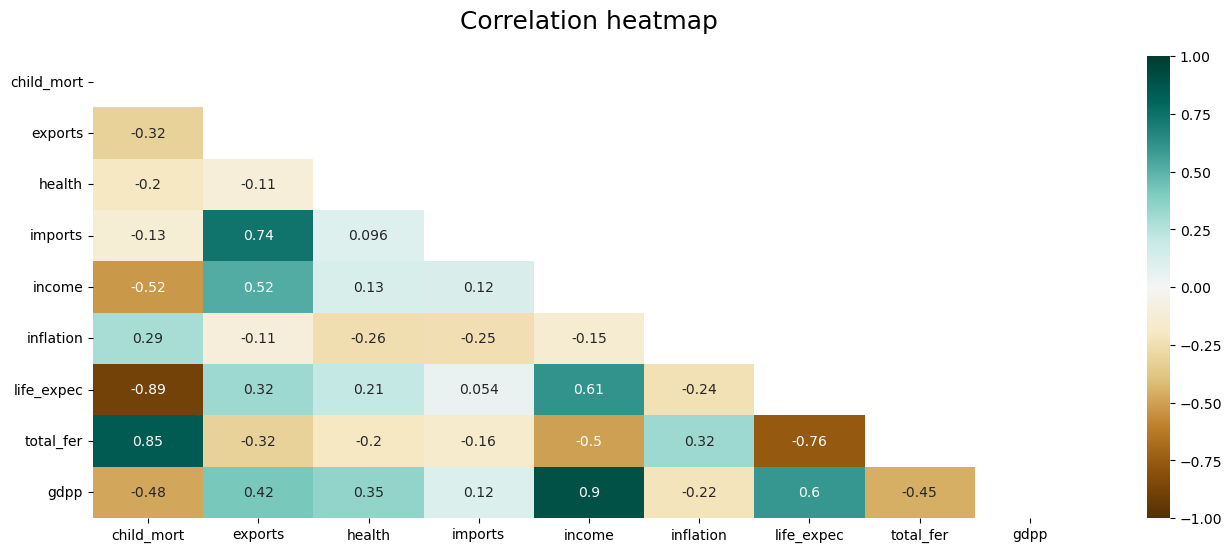

In [27]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation heatmap', fontdict={'fontsize':18}, pad=20)
plt.show()

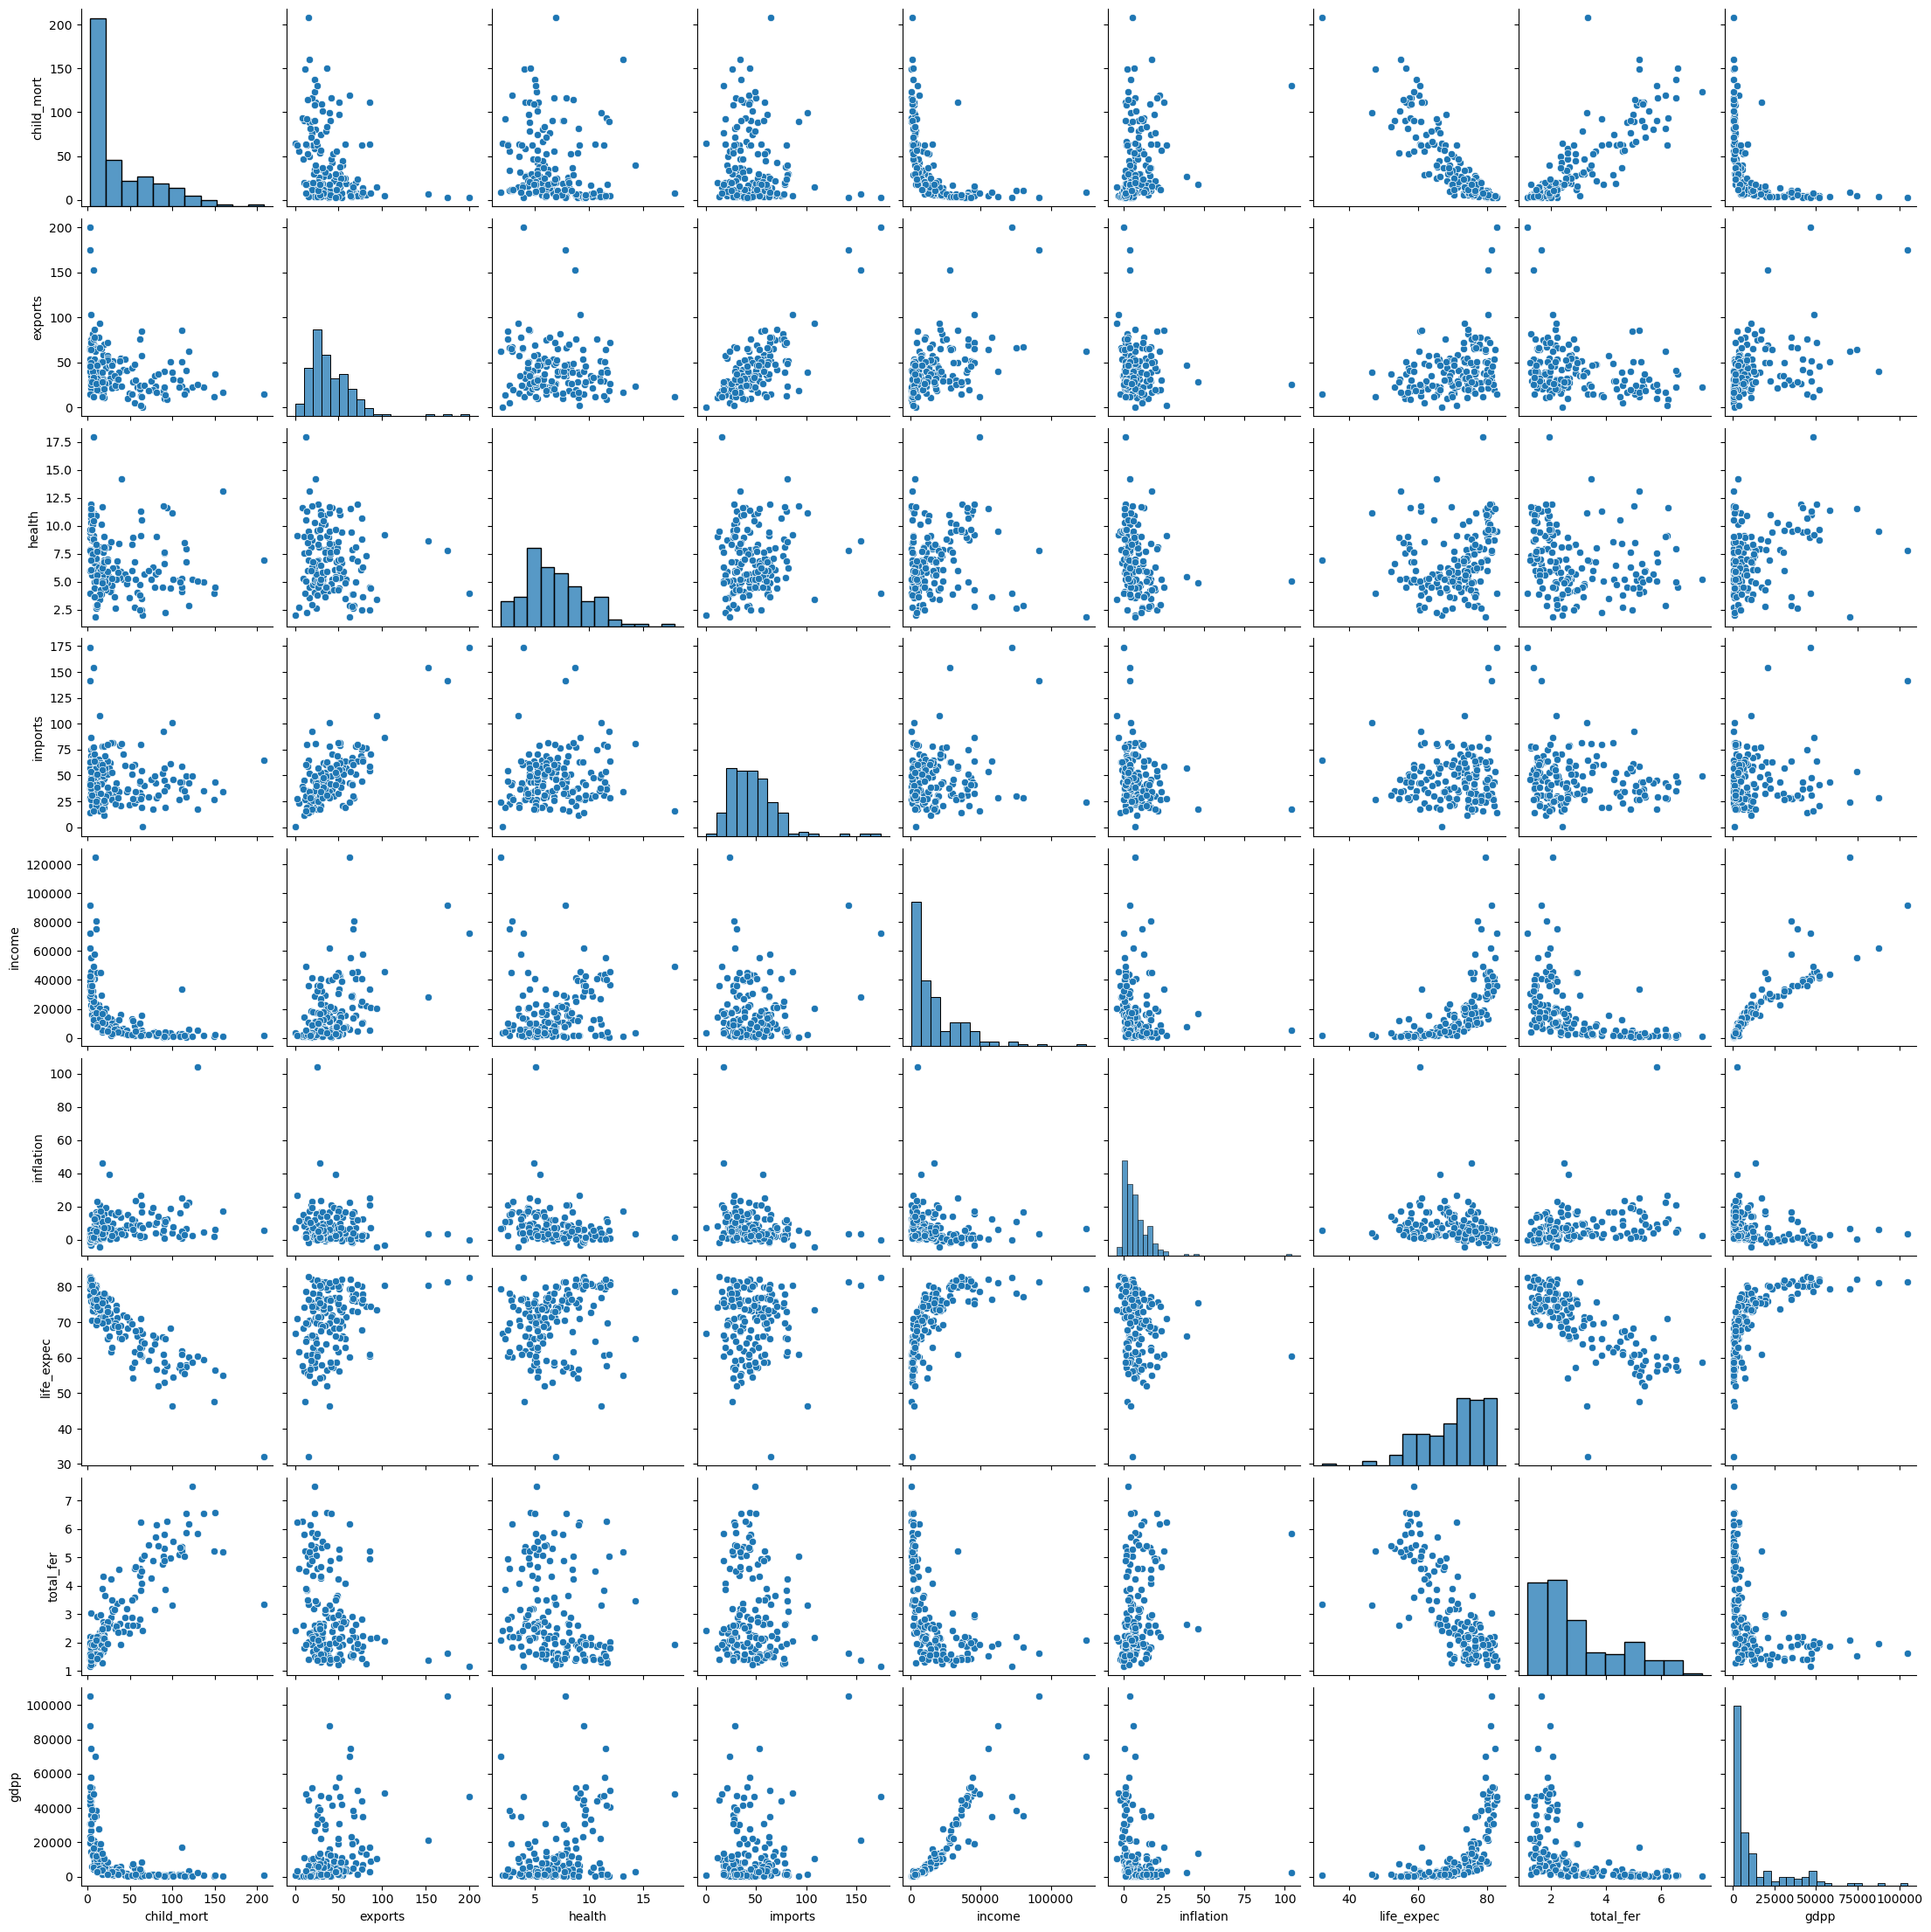

In [28]:
sns.pairplot(df)
plt.show()

In [330]:
df.set_index('country', inplace=True)

In [331]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


### Outlier check

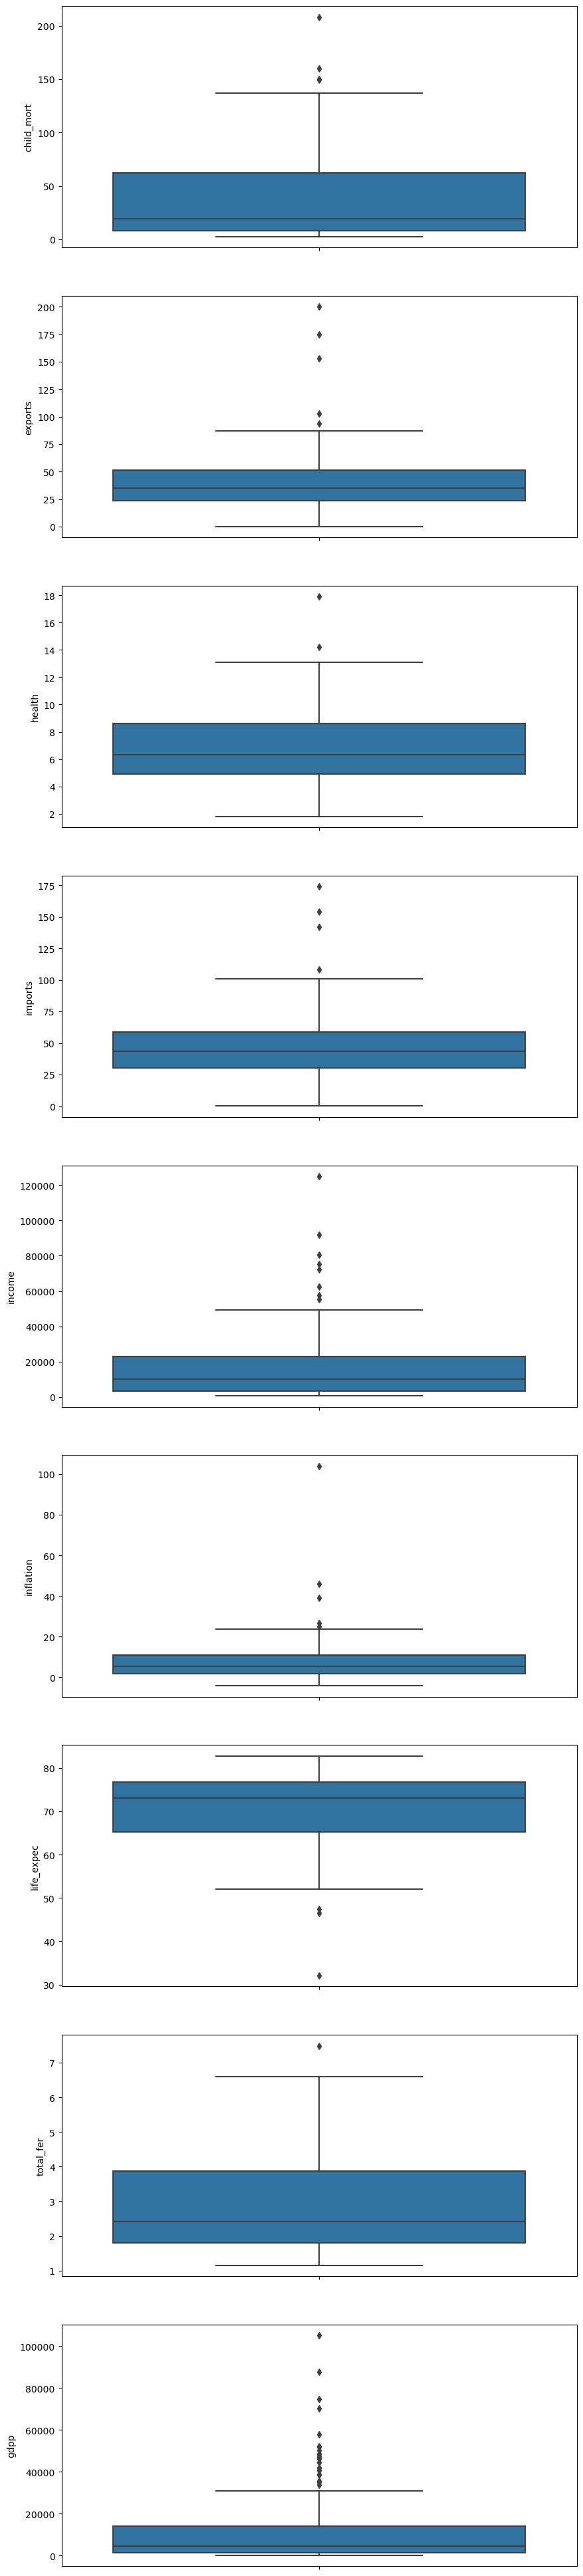

In [332]:
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(10,50))
for i in range(len(df.columns)):
    sns.boxplot(ax=axes[i], y=df.columns[i], data=df)

In [335]:
def boxplot_clip(col):
    q1 = df.loc[:, col].quantile(0.25)
    q3 = df.loc[:, col].quantile(0.75)
    iqr = q3 -  q1
    upperbound = q3 + 1.5*iqr
    lowerbound = q1 - 1.5*iqr
    df[col] = df[col].clip(lowerbound,upperbound)

In [336]:
for i in df.columns:
    boxplot_clip(i)

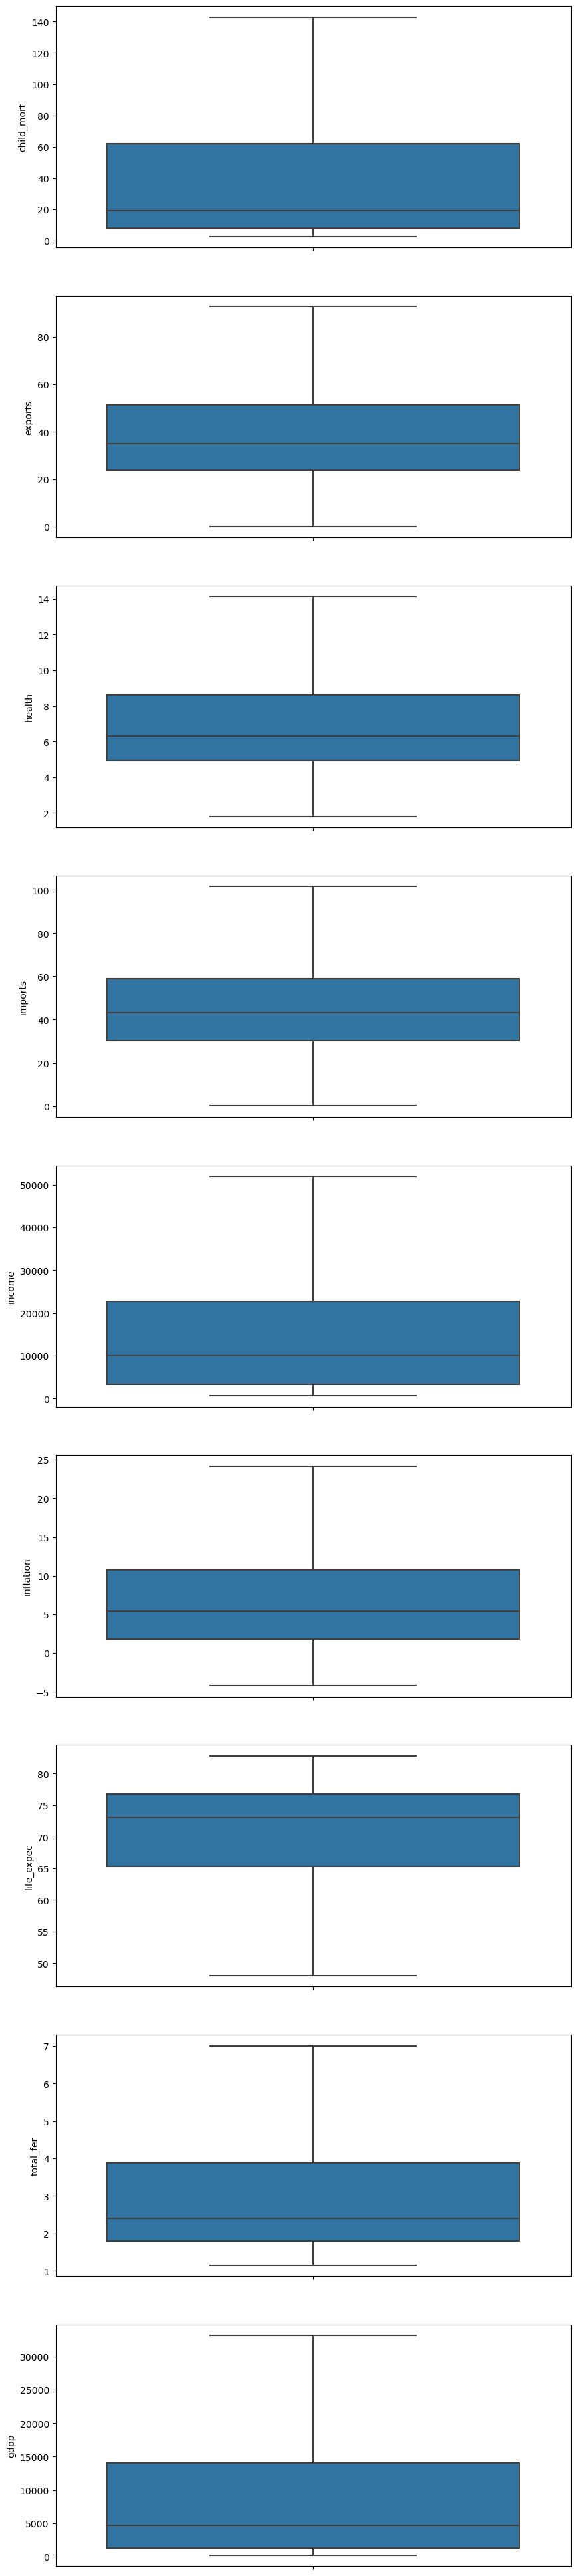

In [337]:
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(10,50))
for i in range(len(df.columns)):
    sns.boxplot(ax=axes[i], y=df.columns[i], data=df)

### Scaling

In [338]:
df_ = copy.deepcopy(df)

In [339]:
df_.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200


In [340]:
from sklearn.preprocessing import StandardScaler
column_names = df.columns
index_names = data.country
s = StandardScaler()
df = s.fit_transform(df)
df = pd.DataFrame(df, index=index_names, columns=column_names)

In [341]:
data.country

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [342]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.369802,-1.391107,0.296013,-0.047444,-0.943936,0.355270,-1.702225,1.915276,-0.846341
Albania,-0.550464,-0.543547,-0.091190,0.135021,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
Algeria,-0.271295,-0.053846,-0.985893,-0.713196,-0.199291,1.351551,0.686859,-0.036691,-0.508868
Angola,2.121210,1.071524,-1.482114,-0.146074,-0.660984,2.293979,-1.243238,2.141784,-0.589198
Antigua and Barbuda,-0.714835,0.280469,-0.286671,0.642965,0.209637,-0.841463,0.722166,-0.543003,0.159686
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.221723,0.332264,-0.579893,0.337212,-0.855555,-0.664945,-0.901941,0.369691,-0.637569
Venezuela,-0.537419,-0.520004,-0.707708,-1.393742,0.038151,2.557260,0.557401,-0.316495,0.271975
Vietnam,-0.375657,1.528265,0.017828,1.693373,-0.753982,0.753184,0.286717,-0.662919,-0.780954


### Insights that have done:

outlier handling:
each row is important and they will be clustered at last. That's why, you cann't drop any row - DONE

scaling is important - DONE

## Clustering with K-Means
Elbow or Silhouette?

In [343]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(df)

a:\Python Bootcamp\Anaconda ucun\envs\MyMain\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

In [344]:
k_means.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [345]:
df_final = copy.deepcopy(data)

In [346]:
df_final.set_index('country', inplace=True)

In [347]:
df_final.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [348]:
df_final['k_means_cluster'] = k_means.labels_

In [349]:
df_final.head(25)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2
Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0


### Meaning of numbers:
Which number is Developed, developing and under-developed?
Ourselves

In [350]:
df_final[df_final['k_means_cluster']==0].head()
# 0 - developed

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster
country,,,,,,,,,,
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,0
Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0
Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0


In [351]:
df_final[df_final['k_means_cluster']==1].head()
# 1 - underdeveloped

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,1
Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,1
Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,1


In [352]:
df_final[df_final['k_means_cluster']==2].head()
# 2 - developing

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster
country,,,,,,,,,,
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,2
Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,2


In [353]:
df_final.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [354]:
df_final.k_means_cluster.replace(to_replace={0:'developed',
                                              1:'underdeveloped',
                                              2:'developing'},
                                              inplace=True)

In [355]:
df_final.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,underdeveloped
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,developing
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,developing
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,underdeveloped
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,developing


In [356]:
df_final.k_means_cluster.value_counts()

developing        78
underdeveloped    48
developed         41
Name: k_means_cluster, dtype: int64

### Hierarchical Agglomerative Clustering

In [357]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean' , linkage='ward')
hc_clusters = hc.fit_predict(df)

In [358]:
hc_clusters

array([2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1,
       1, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 0,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 2,
       2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1,
       0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 2], dtype=int64)

In [359]:
df_final['hc_cluster'] = hc_clusters

In [360]:
df_final.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster,hc_cluster
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,underdeveloped,2
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,developing,1
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,developing,1
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,underdeveloped,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,developing,0


In [361]:
df_final.head(25)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster,hc_cluster
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,underdeveloped,2
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,developing,1
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,developing,1
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,underdeveloped,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,developing,0
Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,developing,1
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,developing,1
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,developed,0
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,developed,0


In [362]:
df_final[df_final['hc_cluster']==0].head()
# 0 - developed

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster,hc_cluster
country,,,,,,,,,,,
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,developing,0
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,developed,0
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,developed,0
Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,developed,0
Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,developed,0


In [363]:
df_final[df_final['hc_cluster']==1].head()
# 1 - developing

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster,hc_cluster
country,,,,,,,,,,,
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,developing,1
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,developing,1
Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,developing,1
Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,developing,1
Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,developing,1


In [364]:
df_final[df_final['hc_cluster']==2].head()
# 2 - underdeveloped

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster,hc_cluster
country,,,,,,,,,,,
Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,underdeveloped,2
Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,underdeveloped,2
Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,underdeveloped,2
Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,underdeveloped,2
Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,underdeveloped,2


In [365]:
df_final['hc_cluster'].replace(to_replace={2:'underdeveloped',
                                           1:'developing',
                                           0:'developed'}, 
                                           inplace=True)

In [366]:
df_final

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster,hc_cluster
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,underdeveloped,underdeveloped
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,developing,developing
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,developing,developing
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,underdeveloped,underdeveloped
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,developing,developed
...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,developing,developed
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,developing,developing
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,developing,developed


In [367]:
# KMeans is best :D
df_final[df_final['k_means_cluster'] != df_final['hc_cluster']]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster,hc_cluster
country,,,,,,,,,,,
Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200,developing,developed
Barbados,14.2,39.500,7.97,48.7000,15300,0.321,76.7,1.78,16000,developing,developed
Belize,18.8,58.200,5.20,57.5000,7880,1.140,71.4,2.71,4340,developing,developed
Bhutan,42.7,42.500,5.20,70.7000,6420,5.990,72.1,2.38,2180,developing,developed
Botswana,52.5,43.600,8.30,51.3000,13300,8.920,57.1,2.88,6350,underdeveloped,developing
Bulgaria,10.8,50.200,6.87,53.0000,15300,1.110,73.9,1.57,6840,developing,developed
Cambodia,44.4,54.100,5.68,59.5000,2520,3.120,66.1,2.88,786,developing,developed
Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,underdeveloped,developing
Croatia,5.5,37.600,7.76,38.1000,20100,0.821,76.3,1.55,13500,developing,developed


In [368]:
df_final['k_means_cluster'].value_counts()

developing        78
underdeveloped    48
developed         41
Name: k_means_cluster, dtype: int64

In [369]:
df_final['hc_cluster'].value_counts()

developed         71
developing        61
underdeveloped    35
Name: hc_cluster, dtype: int64

### Clustering with MiniBatchKmeans 


In [370]:
from sklearn.cluster import MiniBatchKMeans
mini = MiniBatchKMeans(n_clusters=3, init='k-means++', batch_size=256*4, random_state=42)
mini_clusters = mini.fit_predict(df)

a:\Python Bootcamp\Anaconda ucun\envs\MyMain\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [371]:
mini_clusters

array([0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 1, 0,
       2, 2, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0,
       0, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2,
       2, 0, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 0])

In [372]:
df_final['mini_cluster'] = mini_clusters

In [373]:
df_final.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster,hc_cluster,mini_cluster
country,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,underdeveloped,underdeveloped,0
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,developing,developing,2
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,developing,developing,2
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,underdeveloped,underdeveloped,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,developing,developed,1


In [374]:
df_final[df_final['mini_cluster']==0].head(10)
# 0 - underdeveloped

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster,hc_cluster,mini_cluster
country,,,,,,,,,,,,
Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,underdeveloped,underdeveloped,0
Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,underdeveloped,underdeveloped,0
Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,underdeveloped,underdeveloped,0
Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,underdeveloped,developing,0
Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,underdeveloped,underdeveloped,0
Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,underdeveloped,underdeveloped,0
Cambodia,44.4,54.10,5.68,59.5,2520,3.120,66.1,2.88,786,developing,developed,0
Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,underdeveloped,underdeveloped,0
Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,underdeveloped,underdeveloped,0


In [375]:
df_final[df_final['mini_cluster']==1].head(10)
# 1 - developed

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster,hc_cluster,mini_cluster
country,,,,,,,,,,,,
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,developing,developed,1
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,developed,developed,1
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,developed,developed,1
Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,developed,developed,1
Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,developed,developed,1
Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,developing,developed,1
Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,developed,developed,1
Belize,18.8,58.2,5.20,57.5,7880,1.140,71.4,2.71,4340,developing,developed,1
Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610,developing,developing,1


In [376]:
df_final[df_final['mini_cluster']==2].head(10)
# 2 - developing

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster,hc_cluster,mini_cluster
country,,,,,,,,,,,,
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,developing,developing,2
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,developing,developing,2
Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,developing,developing,2
Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,developing,developing,2
Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,developing,developing,2
Bangladesh,49.4,16.0,3.52,21.8,2440,7.14,70.4,2.33,758,developing,developing,2
Belarus,5.5,51.4,5.61,64.5,16200,15.10,70.4,1.49,6030,developing,developing,2
Bhutan,42.7,42.5,5.20,70.7,6420,5.99,72.1,2.38,2180,developing,developed,2
Bolivia,46.6,41.2,4.84,34.3,5410,8.78,71.6,3.20,1980,developing,developing,2


In [377]:
df_final['mini_cluster'].replace(to_replace={2:'developing',
                                           1:'developed',
                                           0:'underdeveloped'}, 
                                           inplace=True)

In [378]:
df_final

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster,hc_cluster,mini_cluster
country,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,underdeveloped,underdeveloped,underdeveloped
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,developing,developing,developing
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,developing,developing,developing
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,underdeveloped,underdeveloped,underdeveloped
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,developing,developed,developed
...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,developing,developed,underdeveloped
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,developing,developing,developing
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,developing,developed,developing


### KMeans vs MiniBatchKMeans
Which one will be better?

In [379]:
df_final[df_final['k_means_cluster']!=df_final['mini_cluster']]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster,hc_cluster,mini_cluster
country,,,,,,,,,,,,
Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200,developing,developed,developed
Barbados,14.2,39.500,7.97,48.7000,15300,0.321,76.7,1.78,16000,developing,developed,developed
Belize,18.8,58.200,5.20,57.5000,7880,1.140,71.4,2.71,4340,developing,developed,developed
Bosnia and Herzegovina,6.9,29.700,11.10,51.3000,9720,1.400,76.8,1.31,4610,developing,developing,developed
Brunei,10.5,67.400,2.84,28.0000,80600,16.700,77.1,1.84,35300,developed,developed,developing
Bulgaria,10.8,50.200,6.87,53.0000,15300,1.110,73.9,1.57,6840,developing,developed,developed
Cambodia,44.4,54.100,5.68,59.5000,2520,3.120,66.1,2.88,786,developing,developed,underdeveloped
Chile,8.7,37.700,7.96,31.3000,19400,8.960,79.1,1.88,12900,developing,developing,developed
Costa Rica,10.2,33.200,10.90,35.0000,13000,6.570,80.4,1.92,8200,developing,developing,developed


In [380]:
df_final[df_final['k_means_cluster']!=df_final['mini_cluster']].shape

(41, 12)

In [381]:
df_final.k_means_cluster.value_counts()

developing        78
underdeveloped    48
developed         41
Name: k_means_cluster, dtype: int64

In [382]:
df_final.mini_cluster.value_counts()

developed         65
underdeveloped    55
developing        47
Name: mini_cluster, dtype: int64

In [383]:
df_final.hc_cluster.value_counts()

developed         71
developing        61
underdeveloped    35
Name: hc_cluster, dtype: int64

# General Evaluation

In [384]:
df_final.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster,hc_cluster,mini_cluster
country,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,underdeveloped,underdeveloped,underdeveloped
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,developing,developing,developing
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,developing,developing,developing
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,underdeveloped,underdeveloped,underdeveloped
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,developing,developed,developed


In [385]:
import plotly.express as px

bar_fig = px.bar(df_final, x=df_final['k_means_cluster'].value_counts().index, y=df_final['k_means_cluster'].value_counts().values, 
                  color=df_final['k_means_cluster'].value_counts().index, title='KMeans Cluster Distribution')
bar_fig.update_xaxes(title='Cluster')
bar_fig.update_yaxes(title='Count')
bar_fig.show()

In [386]:
import plotly.express as px
import plotly.graph_objects as go

pie_data = df_final['k_means_cluster'].value_counts()
pie_labels = pie_data.index
pie_values = pie_data.values

pie_fig = go.Figure(data=[go.Pie(labels=pie_labels, values=pie_values)])
pie_fig.update_traces(textinfo='percent+label', hole=0.4)
pie_fig.update_layout(title='KMeans Cluster Distribution')
pie_fig.show()

In [387]:
df_final.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'k_means_cluster', 'hc_cluster',
       'mini_cluster'],
      dtype='object')

In [388]:
bar_fig = px.bar(df_final, x=df_final['hc_cluster'].value_counts().index, y=df_final['hc_cluster'].value_counts().values, 
                  color=df_final['hc_cluster'].value_counts().index, title='Hierarchical Agglomerative Clustering Distribution')
bar_fig.update_xaxes(title='Cluster')
bar_fig.update_yaxes(title='Count')
bar_fig.show()

In [389]:
pie_data = df_final['hc_cluster'].value_counts()
pie_labels = pie_data.index
pie_values = pie_data.values

pie_fig = go.Figure(data=[go.Pie(labels=pie_labels, values=pie_values)])
pie_fig.update_traces(textinfo='percent+label', hole=0.4)
pie_fig.update_layout(title='Hierarchical Agglomerative Clustering Distribution')
pie_fig.show()

In [390]:
bar_fig = px.bar(df_final, x=df_final['mini_cluster'].value_counts().index, y=df_final['mini_cluster'].value_counts().values, 
                  color=df_final['mini_cluster'].value_counts().index, title='MiniBatchKMeans Clustering Distribution')
bar_fig.update_xaxes(title='Cluster')
bar_fig.update_yaxes(title='Count')
bar_fig.show()

In [391]:
pie_data = df_final['mini_cluster'].value_counts()
pie_labels = pie_data.index
pie_values = pie_data.values

pie_fig = go.Figure(data=[go.Pie(labels=pie_labels, values=pie_values)])
pie_fig.update_traces(textinfo='percent+label', hole=0.4)
pie_fig.update_layout(title='MiniBatchKMeans Clustering Distribution')
pie_fig.show()

## PCA (Principal Component Analysis)

In [392]:
df_final.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster,hc_cluster,mini_cluster
country,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,underdeveloped,underdeveloped,underdeveloped
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,developing,developing,developing
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,developing,developing,developing
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,underdeveloped,underdeveloped,underdeveloped
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,developing,developed,developed


In [393]:
df_for_pca = df_final.drop(columns=['k_means_cluster', 'hc_cluster', 'mini_cluster'], axis=1)

In [395]:
df_for_pca

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [396]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df_after_pca = pca.fit_transform(df_for_pca)

In [399]:
df_after_pca

array([[-1.98151280e+04, -1.65112472e+03],
       [-1.13389390e+04,  1.49346903e+03],
       [-8.92635259e+03,  3.26468410e+03],
       [-1.46524659e+04, -8.67795270e+02],
       [ 8.96142032e+02,  1.89847815e+03],
       [-6.99699306e+02,  3.00451171e+03],
       [-1.42839444e+04, -9.29672241e+01],
       [ 4.43727025e+04, -1.16354527e+04],
       [ 4.22463421e+04, -6.76525844e+03],
       [-5.72551309e+03,  4.39118182e+03],
       [ 1.45108648e+04, -6.97390702e+03],
       [ 2.27232733e+04,  1.08330393e+04],
       [-1.90710762e+04, -1.22994979e+03],
       [ 7.44735254e+02, -3.47340570e+03],
       [-5.44962091e+03,  4.39049953e+03],
       [ 3.90029276e+04, -6.39086337e+03],
       [-1.26570298e+04, -9.63440942e+01],
       [-1.95217046e+04, -1.65585861e+03],
       [-1.52018204e+04,  4.70524185e+02],
       [-1.60732239e+04, -7.79039217e+01],
       [-1.11343558e+04,  9.71315924e+02],
       [-7.33742276e+03,  2.16588186e+03],
       [-3.13382968e+03, -5.34572278e+02],
       [ 6.

In [400]:
# KMeans
k_means_pca = KMeans(n_clusters=3, random_state=42)
k_means_pca.fit(df_after_pca)

a:\Python Bootcamp\Anaconda ucun\envs\MyMain\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

In [401]:
df_final['PCA_k_means_cluster'] = k_means_pca.labels_

In [404]:
df_final.head(25)
# 0 - developing
# 1 - underdeveloped
# 2 - developed

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster,hc_cluster,mini_cluster,PCA_k_means_cluster
country,,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,underdeveloped,underdeveloped,underdeveloped,0
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,developing,developing,developing,0
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,developing,developing,developing,0
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,underdeveloped,underdeveloped,underdeveloped,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,developing,developed,developed,0
Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,developing,developing,developing,0
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,developing,developing,developing,0
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,developed,developed,developed,2
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,developed,developed,developed,2


In [405]:
df_final.PCA_k_means_cluster.replace(to_replace={0:'developing',
                                              1:'underdeveloped',
                                              2:'developed'},
                                              inplace=True)

In [406]:
df_final.head(25)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster,hc_cluster,mini_cluster,PCA_k_means_cluster
country,,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,underdeveloped,underdeveloped,underdeveloped,developing
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,developing,developing,developing,developing
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,developing,developing,developing,developing
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,underdeveloped,underdeveloped,underdeveloped,developing
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,developing,developed,developed,developing
Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,developing,developing,developing,developing
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,developing,developing,developing,developing
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,developed,developed,developed,developed
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,developed,developed,developed,developed


In [407]:
bar_fig = px.bar(df_final, x=df_final['PCA_k_means_cluster'].value_counts().index, y=df_final['PCA_k_means_cluster'].value_counts().values, 
                  color=df_final['PCA_k_means_cluster'].value_counts().index, title='PCA KMeans Clustering Distribution')
bar_fig.update_xaxes(title='Cluster')
bar_fig.update_yaxes(title='Count')
bar_fig.show()

In [408]:
pie_data = df_final['PCA_k_means_cluster'].value_counts()
pie_labels = pie_data.index
pie_values = pie_data.values

pie_fig = go.Figure(data=[go.Pie(labels=pie_labels, values=pie_values)])
pie_fig.update_traces(textinfo='percent+label', hole=0.4)
pie_fig.update_layout(title='PCA KMeans Clustering Distribution')
pie_fig.show()

# Thanks